#Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import altair as alt
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10,10)})
print('imports ok')

imports ok


#Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/S3/DATA ENCODING/AIA - DATA ENCODING  G06/01_WORKING FILES/CSV/TestDataset_080621_Twisted.csv')
pd.set_option('display.max_columns', None)
#cleanData = data.loc[:,'hoys1':'RotAngle']
#print(df.to_string()) 
print(df)

      hoys1  hoys2  hoys3  hoys4  hoys5  hoys6  hoys7  hoys8  Bvolume  \
0      3225   3226   3227   3228   3229   3230   3231   3232    32387   
1      7545   7546   7547   7548   7549   7550   7551   7552    30195   
2      5097   5098   5099   5100   5101   5102   5103   5104    29062   
3      3321   3322   3323   3324   3325   3326   3327   3328    55240   
4      6249   6250   6251   6252   6253   6254   6255   6256    11885   
...     ...    ...    ...    ...    ...    ...    ...    ...      ...   
1497   7017   7018   7019   7020   7021   7022   7023   7024    43126   
1498   3633   3634   3635   3636   3637   3638   3639   3640    19053   
1499   3273   3274   3275   3276   3277   3278   3279   3280    20458   
1500   5865   5866   5867   5868   5869   5870   5871   5872    31661   
1501   8481   8482   8483   8484   8485   8486   8487   8488    46163   

      BtotalArea  BNoFloors  Bheight  RotAngle  f1  f2  f3  f4  f5  f6  f7  \
0          11071         33      100        5

In [4]:
#Remove null values from dataset
df_clean = df.dropna(how = "any")
df_clean.info()
df_clean.reset_index(inplace=True, drop = True)
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 1501
Columns: 113 entries, hoys1 to f100
dtypes: int64(113)
memory usage: 1.3 MB


,hoys1,hoys2,hoys3,hoys4,hoys5,hoys6,hoys7,hoys8,Bvolume,BtotalArea,BNoFloors,Bheight,RotAngle,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100
0,3225,3226,3227,3228,3229,3230,3231,3232,32387,11071,33,100,57,3,4,3,2,0,0,0,1,1,1,3,3,3,2,1,1,1,1,0,0,2,2,3,2,1,0,0,0,1,0,3,2,1,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,3,2,1,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,2,2,2,2,0,0,0,0,0,0,3,3,2,2,1,1,0,0,0,0,3,3,2,2,0,0,0,0,0,0
1,7545,7546,7547,7548,7549,7550,7551,7552,30195,10361,25,76,43,4,4,4,4,4,5,5,5,5,6,5,5,5,5,5,6,6,6,6,6,5,4,4,4,4,5,7,6,6,7,6,5,5,4,4,5,7,7,7,7,6,4,4,3,0,0,7,6,7,7,6,5,4,2,0,0,6,7,7,7,6,4,4,2,2,3,6,7,6,7,6,5,4,3,3,4,6,7,6,7,6,5,4,4,3,4,5,6,7,8,5,5,4,4,3,4,5,6,7,8
2,5097,5098,5099,5100,5101,5102,5103,5104,29062,10013,25,76,53,3,4,2,1,0,0,1,1,1,1,3,3,3,2,1,1,1,0,0,1,3,3,3,2,0,0,0,0,0,0,3,2,1,0,0,0,1,0,0,0,3,2,0,0,0,0,0,0,0,0,3,3,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,2,2,2,1,1,0,0,0,0,0,3,3,3,2,1,1,0,0,0,0,2,2,4,2,0,0,0,0,0,0
3,3321,3322,3323,3324,3325,3326,3327,3328,55240,19111,44,131,74,3,4,2,1,0,0,0,1,1,1,3,3,1,1,1,1,1,1,0,0,2,2,1,2,1,0,0,0,1,0,3,2,1,1,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,2,1,1,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,2,2,2,1,0,0,0,0,0,0,2,3,2,2,1,0,0,0,0,0,3,3,1,1,0,0,0,0,0,0
4,6249,6250,6251,6252,6253,6254,6255,6256,11885,4104,19,58,8,6,5,5,5,5,5,5,1,0,0,4,4,4,5,4,5,5,3,1,0,5,4,4,5,5,6,6,3,0,0,4,4,3,4,3,4,6,4,0,0,6,5,4,0,0,0,7,3,0,0,6,4,3,1,0,0,7,1,0,0,4,3,1,1,2,6,7,3,0,0,5,3,2,3,4,6,6,2,0,0,4,3,3,4,5,5,6,5,0,0,4,2,3,4,5,5,6,4,1,1


drop columns with similar values 


In [5]:
#for col in df.columns:
  #if len(df[col].unique()) ==1:
    #df.drop([col], axis=1, inplace=True)
#print(df)

In [6]:
# Check data types
df.info()
# Print the first 5 rows
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Columns: 113 entries, hoys1 to f100
dtypes: int64(113)
memory usage: 1.3 MB


,hoys1,hoys2,hoys3,hoys4,hoys5,hoys6,hoys7,hoys8,Bvolume,BtotalArea,BNoFloors,Bheight,RotAngle,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100
0,3225,3226,3227,3228,3229,3230,3231,3232,32387,11071,33,100,57,3,4,3,2,0,0,0,1,1,1,3,3,3,2,1,1,1,1,0,0,2,2,3,2,1,0,0,0,1,0,3,2,1,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,3,2,1,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,2,2,2,2,0,0,0,0,0,0,3,3,2,2,1,1,0,0,0,0,3,3,2,2,0,0,0,0,0,0
1,7545,7546,7547,7548,7549,7550,7551,7552,30195,10361,25,76,43,4,4,4,4,4,5,5,5,5,6,5,5,5,5,5,6,6,6,6,6,5,4,4,4,4,5,7,6,6,7,6,5,5,4,4,5,7,7,7,7,6,4,4,3,0,0,7,6,7,7,6,5,4,2,0,0,6,7,7,7,6,4,4,2,2,3,6,7,6,7,6,5,4,3,3,4,6,7,6,7,6,5,4,4,3,4,5,6,7,8,5,5,4,4,3,4,5,6,7,8
2,5097,5098,5099,5100,5101,5102,5103,5104,29062,10013,25,76,53,3,4,2,1,0,0,1,1,1,1,3,3,3,2,1,1,1,0,0,1,3,3,3,2,0,0,0,0,0,0,3,2,1,0,0,0,1,0,0,0,3,2,0,0,0,0,0,0,0,0,3,3,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,2,2,2,1,1,0,0,0,0,0,3,3,3,2,1,1,0,0,0,0,2,2,4,2,0,0,0,0,0,0
3,3321,3322,3323,3324,3325,3326,3327,3328,55240,19111,44,131,74,3,4,2,1,0,0,0,1,1,1,3,3,1,1,1,1,1,1,0,0,2,2,1,2,1,0,0,0,1,0,3,2,1,1,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,2,1,1,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,2,2,2,1,0,0,0,0,0,0,2,3,2,2,1,0,0,0,0,0,3,3,1,1,0,0,0,0,0,0
4,6249,6250,6251,6252,6253,6254,6255,6256,11885,4104,19,58,8,6,5,5,5,5,5,5,1,0,0,4,4,4,5,4,5,5,3,1,0,5,4,4,5,5,6,6,3,0,0,4,4,3,4,3,4,6,4,0,0,6,5,4,0,0,0,7,3,0,0,6,4,3,1,0,0,7,1,0,0,4,3,1,1,2,6,7,3,0,0,5,3,2,3,4,6,6,2,0,0,4,3,3,4,5,5,6,5,0,0,4,2,3,4,5,5,6,4,1,1


In [7]:
# Descriptive statistics
df.describe()

,hoys1,hoys2,hoys3,hoys4,hoys5,hoys6,hoys7,hoys8,Bvolume,BtotalArea,BNoFloors,Bheight,RotAngle,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100
count,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.0,1502.0,1502.000000,1502.000000,1502.000000,1502.000000,1502.00000,1502.000000,1502.000000,1502.000000,1502.000000,1502.0,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000
mean,4212.898802,4213.898802,4214.898802,4215.898802,4216.898802,4217.898802,4218.898802,4219.898802,35071.627164,12105.698402,33.282290,99.824900,47.420772,4.011984,3.873502,3.954061,3.626498,3.597204,3.496671,3.302929,2.937417,2.775632,2.665113,4.059254,3.920107,3.924101,3.614514,3.800266,4.017310,3.959387,3.364181,2.878162,2.441411,4.187084,3.986684,3.835553,3.478029,3.388815,3.563915,3.684421,3.439414,2.958722,2.365513,4.260320,3.774301,3.344208,2.452064,1.687084,1.984021,3.658455,3.530626,3.006658,2.543276,4.386818,3.699734,2.870839,0.775632,0.0,0.0,2.151132,3.458056,2.931425,2.551265,4.15779,3.542610,2.733688,0.687750,0.009987,0.0,2.321571,3.449401,3.119840,2.574567,3.981358,3.357523,2.519308,1.589880,0.920772,1.284953,3.402130,3.613848,3.227031,2.535952,4.100533,3.440080,2.968708,2.211718,2.330226,2.893475,3.191744,3.278961,2.998003,2.553262,4.077896,3.685752,3.282956,2.683755,2.776298,3.042610,3.334887,3.362850,3.053262,2.605859,3.649134,3.316911,3.133822,2.778961,2.729694,2.950067,3.157124,3.121172,2.871505,2.780293
std,2511.714817,2511.714817,2511.714817,2511.714817,2511.714817,2511.714817,2511.714817,2511.714817,15792.476867,5348.806732,9.784497,29.350792,25.099855,0.919036,1.348122,1.622179,1.986877,2.267475,2.572530,2.609516,2.336473,2.263370,2.399555,0.985480,1.339308,1.532101,1.635671,1.854839,2.200107,2.494033,2.609340,2.726814,2.762452,1.568432,1.642566,1.542725,1.459827,1.983095,2.586977,3.134814,3.071216,3.070072,3.082513,1.698692,1.945714,2.013122,1.791989,1.937554,2.255147,2.972424,3.301635,3.183269,3.233186,1.840448,2.137446,2.319133,1.445752,0.0,0.0,2.966467,3.262128,3.164167,3.327309,2.16532,2.189365,2.175124,1.191396,0.152374,0.0,2.922002,3.357815,3.358288,3.383854,2.129310,2.076327,1.870017,1.240384,1.101018,2.026151,2.710199,3.260409,3.316482,3.376207,1.745618,1.632063,1.365690,1.106782,1.409071,2.198200,2.774296,3.126270,3.158166,3.290432,1.545638,1.399456,1.073807,1.184168,1.553152,1.994876,2.429355,2.863221,3.156979,3.317797,1.577679,1.634723,1.449138,1.518839,1.712177,2.134900,2.441442,2.784504,2.907662,3.224603
min,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,6290.

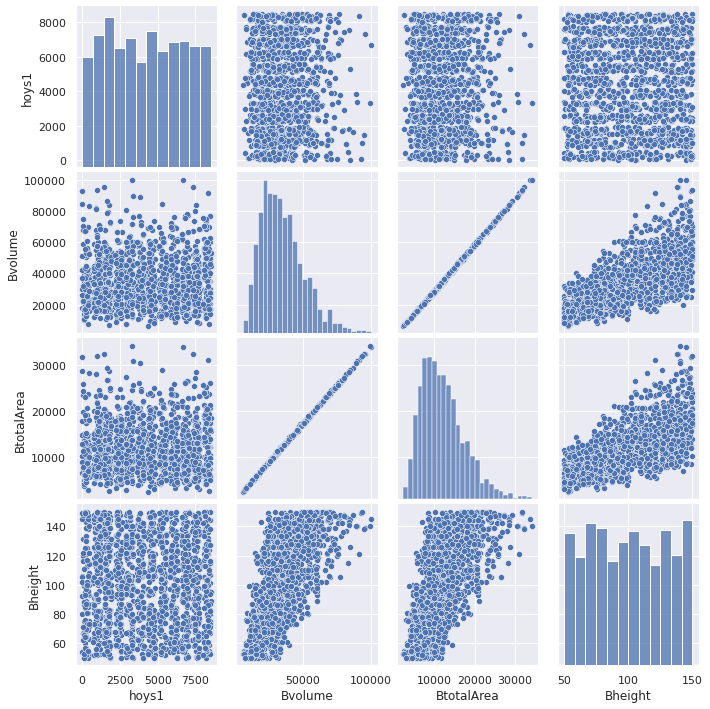

In [8]:
data_numerical = df[["hoys1",	"Bvolume",	"BtotalArea",	"Bheight"]]
sns.pairplot(data_numerical)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc1ce421f90>]],
      dtype=object)

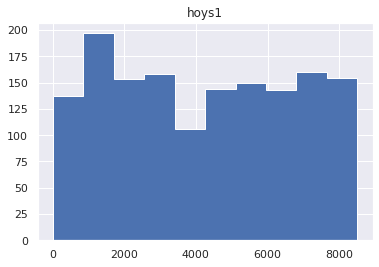

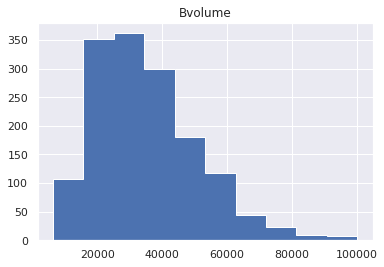

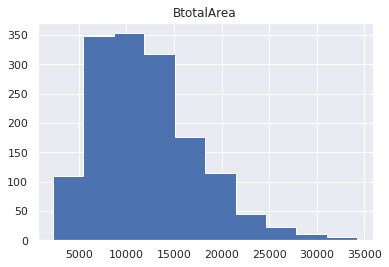

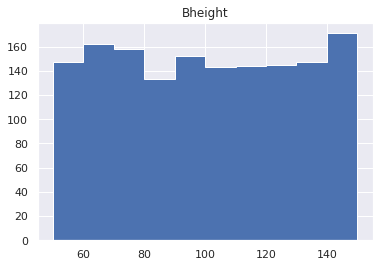

In [9]:
df.hist("hoys1", histtype='stepfilled')
df.hist("Bvolume", histtype='stepfilled')
df.hist("BtotalArea", histtype='stepfilled')
df.hist("Bheight", histtype='stepfilled')

#df.hist("Side_LengthA", histtype='stepfilled')
#df.hist("Side_LenghtB", histtype='stepfilled')
#df.hist("Width_A", histtype='stepfilled')
#df.hist("Width_B", histtype='stepfilled')
#df.hist("#Shadow_Hits", histtype='stepfilled')
#df_clean.hist(color='Steelblue')

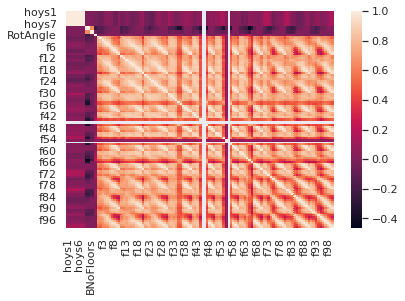

In [10]:
#Correlation Plot
sns.heatmap(df_clean.corr()) #0 = no correlation

#PCA

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
# Let's standard-scale our data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_clean)
data_scaled.shape

(1502, 113)

In [13]:
# What are mean and Sd now?
pd.DataFrame(data_scaled, columns=df_clean.columns).describe()

,hoys1,hoys2,hoys3,hoys4,hoys5,hoys6,hoys7,hoys8,Bvolume,BtotalArea,BNoFloors,Bheight,RotAngle,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100
count,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1502.0,1502.0,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1502.0,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1.502000e+03
mean,7.598597e-17,7.598597e-17,7.598597e-17,7.598597e-17,7.598597e-17,7.598597e-17,7.598597e-17,7.598597e-17,-9.239539e-18,1.685292e-17,2.041569e-16,-5.588073e-17,-4.213230e-17,-2.655074e-16,-9.561999e-17,2.713791e-16,8.574292e-17,1.465021e-16,-6.145402e-16,-5.018918e-16,-1.887083e-16,-8.655600e-17,2.232273e-17,4.673728e-16,2.862040e-16,1.429357e-17,2.024937e-16,-1.682335e-16,-3.202794e-16,4.595377e-16,-8.574292e-18,9.638687e-17,9.727387e-17,-1.065873e-16,9.313455e-18,-1.020045e-16,-3.052744e-17,1.790253e-16,-1.033350e-16,2.010524e-16,6.548985e-17,3.608594e-16,-5.085442e-17,-1.234402e-16,-1.345277e-16,4.703295e-16,1.833125e-16,-9.742170e-17,6.741168e-17,2.346104e-16,1.212228e-17,1.014132e-16,-2.318016e-16,-1.596592e-17,-1.828690e-16,1.360060e-17,-1.901128e-16,0.0,0.0,-1.320145e-16,2.496893e-16,4.885868e-17,-5.499374e-17,-1.082135e-16,-3.681032e-17,3.547983e-17,-3.479980e-16,-1.607680e-16,0.0,2.307667e-16,-1.912954e-16,2.910824e-16,-2.557504e-17,-3.063092e-16,1.027437e-17,8.382110e-17,-1.094701e-16,6.393761e-17,8.574292e-18,4.955350e-16,2.941869e-17,1.374843e-17,-8.278627e-18,2.675771e-17,1.556678e-16,-1.110223e-16,-9.343022e-17,3.321799e-16,3.776384e-16,1.433976e-16,6.482461e-17,1.037046e-16,-3.104485e-17,5.174142e-18,-1.612854e-16,-2.492458e-16,-1.670878e-16,1.173237e-16,2.891976e-18,-7.539464e-18,4.460850e-16,-2.017915e-17,1.719293e-16,1.216663e-16,-2.745252e-16,-3.082310e-17,1.656649e-16,-3.640378e-17,-9.823247e-17,-6.800301e-18,4.789777e-17,1.519719e-16,1.818341e-17
std,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+00,1.000333e+0

##Excuting PCA

In [14]:
# Instantiate a PCA object
from sklearn.decomposition import PCA # PCA from  sklearn, the python ML standard library
model = PCA() # Number of components needs to be defined. We just for illustration take about half of the numbers of features

In [15]:
np.any(np.isnan(df_clean))
np.all(np.isfinite(df_clean))

True

In [16]:
# Fit the model
model.fit(data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
# Fit and transform the data
data_reduced = model.transform(data_scaled)

##Inspect Results

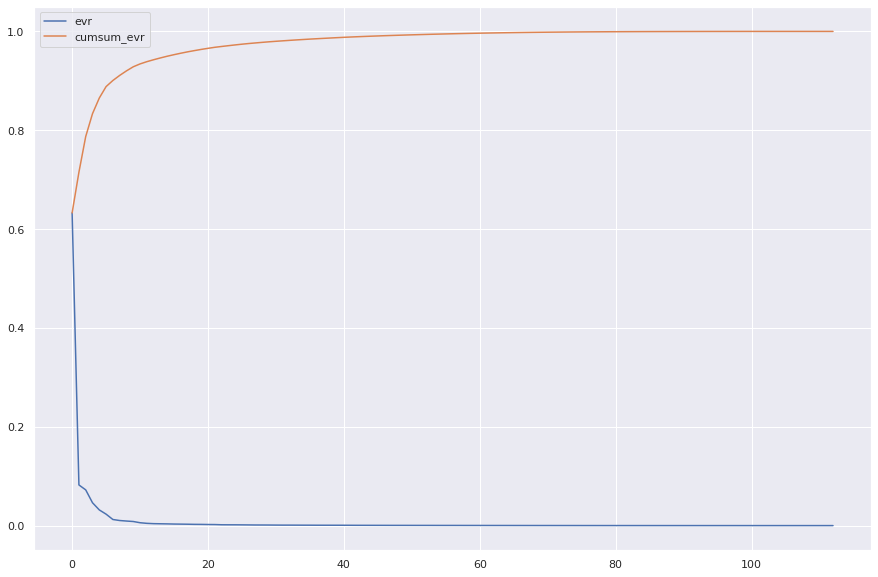

In [18]:
plot_data = pd.DataFrame({'evr': model.explained_variance_ratio_, 'cumsum_evr': np.cumsum(model.explained_variance_ratio_)}).stack() #this is the plot we want to do, which is an attribute of the model instance. Each of the points is our principal components. The first one explains 70% of our variability. First and second would be enough
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1)) #If the first one is near 1 then we have too many features

In [19]:
print(model.explained_variance_ratio_)

[6.32730225e-01 8.22648464e-02 7.22793476e-02 4.62236134e-02
 3.17131351e-02 2.31359804e-02 1.23276473e-02 1.02731906e-02
 9.20566613e-03 8.26817412e-03 5.79304813e-03 4.55376531e-03
 3.91841690e-03 3.66724542e-03 3.44371644e-03 3.12396684e-03
 2.95644121e-03 2.76662097e-03 2.50940466e-03 2.41524641e-03
 2.19065729e-03 2.08216742e-03 1.66447734e-03 1.59404105e-03
 1.56944991e-03 1.47533274e-03 1.33977918e-03 1.20708731e-03
 1.17487836e-03 1.11959471e-03 1.01062080e-03 9.41820473e-04
 9.38103548e-04 8.93823697e-04 8.38023252e-04 8.20014334e-04
 7.53912278e-04 7.38536448e-04 7.18787295e-04 7.08315904e-04
 6.83200984e-04 6.30524472e-04 5.75127728e-04 5.54699680e-04
 5.22521247e-04 5.07968287e-04 4.92981593e-04 4.53924815e-04
 4.42343810e-04 4.40551173e-04 4.16589026e-04 3.96218706e-04
 3.86649077e-04 3.73304569e-04 3.51118726e-04 3.36698236e-04
 3.33149463e-04 3.16648910e-04 2.93627022e-04 2.86367309e-04
 2.75509922e-04 2.53998735e-04 2.37911984e-04 2.35052252e-04
 2.22115829e-04 1.999775

###Plotting all the PCS


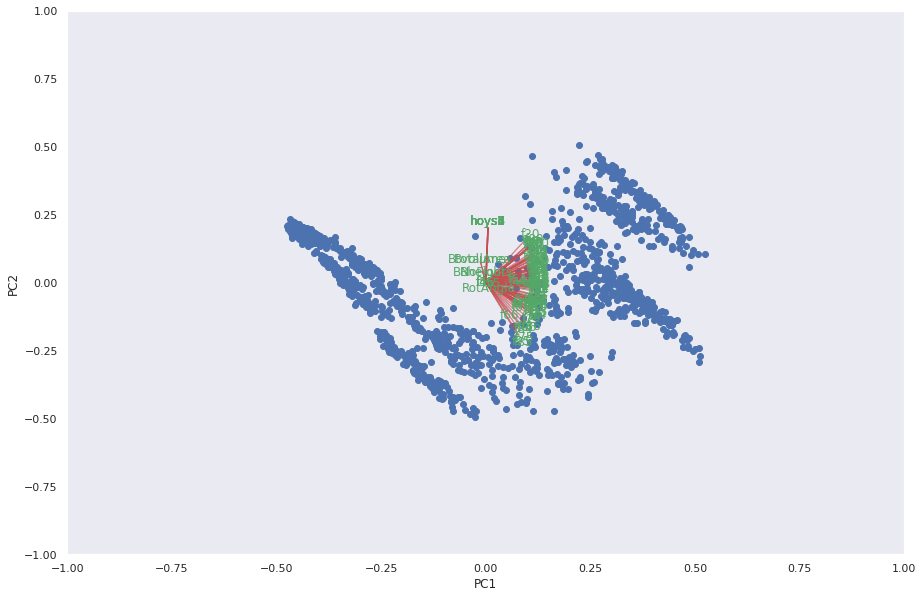

In [20]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, df_clean.columns[i], color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(data_reduced[:,0:2],np.transpose(model.components_[0:2, :]))
plt.show()

In [21]:
pcscores = pd.DataFrame(data_reduced)
loadings = pd.DataFrame(model.components_, columns=df_clean.columns)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

In [22]:
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="bone", vmin=-1, vmax=1, annot=True, ax=ax)

Output hidden; open in https://colab.research.google.com to view.

In [23]:
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(loadings.transpose(), center=0, linewidths=0.1, 
                 cmap="bone", vmin=-1, vmax=1, annot=True, ax=ax)

Output hidden; open in https://colab.research.google.com to view.

In [24]:
# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = df_clean.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

print(df)

         0        1
0      PC0      f43
1      PC1    hoys4
2      PC2    hoys4
3      PC3  Bvolume
4      PC4      f57
..     ...      ...
108  PC108      f56
109  PC109    hoys4
110  PC110      f45
111  PC111      f46
112  PC112    hoys1

[113 rows x 2 columns]


#Preparing Data

In [25]:
# Select the (independant) features that we are going to use to train the model
data_train = df_clean.loc[:,'Bvolume':'RotAngle']
print(data_train)

      Bvolume  BtotalArea  BNoFloors  Bheight  RotAngle
0       32387       11071         33      100        57
1       30195       10361         25       76        43
2       29062       10013         25       76        53
3       55240       19111         44      131        74
4       11885        4104         19       58         8
...       ...         ...        ...      ...       ...
1497    43126       14790         37      112        82
1498    19053        6643         32       96        87
1499    20458        7321         20       59        37
1500    31661       11162         29       86        71
1501    46163       15725         46      138        14

[1502 rows x 5 columns]


#Regression

In [26]:
# Load and instantiate a StandardSclaer 
from sklearn.preprocessing import StandardScaler
import joblib

scalerX = StandardScaler()
scalerX.fit(data_train)

joblib.dump(scalerX, 'scalerX.pkl')

# Transform into a categorical variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Apply the scaler to our X-features
x_scaled = scalerX.transform(data_train)
x_scaled

array([[-0.17005067, -0.19350914, -0.02886038,  0.00596775,  0.38177185],
       [-0.30889717, -0.32629324, -0.84675265, -0.81199973, -0.17618607],
       [-0.38066408, -0.39137615, -0.84675265, -0.81199973,  0.22235531],
       ...,
       [-0.92566191, -0.8948336 , -1.35793531, -1.39139336, -0.41531089],
       [-0.21603724, -0.17649034, -0.43780651, -0.47117995,  0.93972977],
       [ 0.70255394,  0.67688126,  1.30021456,  1.30108293, -1.33195604]])

In [27]:
# Define the dependant variable / target to predict 
y_reg = df_clean.loc[:,'f1':'f100'] # NUMBER OF VALUES YOU ARE PREDICTING, THIS NUMBER SHOULD MATCH THE FINAL LAYER 
y_reg



,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100
0,3,4,3,2,0,0,0,1,1,1,3,3,3,2,1,1,1,1,0,0,2,2,3,2,1,0,0,0,1,0,3,2,1,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,3,2,1,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,2,2,2,2,0,0,0,0,0,0,3,3,2,2,1,1,0,0,0,0,3,3,2,2,0,0,0,0,0,0
1,4,4,4,4,4,5,5,5,5,6,5,5,5,5,5,6,6,6,6,6,5,4,4,4,4,5,7,6,6,7,6,5,5,4,4,5,7,7,7,7,6,4,4,3,0,0,7,6,7,7,6,5,4,2,0,0,6,7,7,7,6,4,4,2,2,3,6,7,6,7,6,5,4,3,3,4,6,7,6,7,6,5,4,4,3,4,5,6,7,8,5,5,4,4,3,4,5,6,7,8
2,3,4,2,1,0,0,1,1,1,1,3,3,3,2,1,1,1,0,0,1,3,3,3,2,0,0,0,0,0,0,3,2,1,0,0,0,1,0,0,0,3,2,0,0,0,0,0,0,0,0,3,3,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,2,2,2,1,1,0,0,0,0,0,3,3,3,2,1,1,0,0,0,0,2,2,4,2,0,0,0,0,0,0
3,3,4,2,1,0,0,0,1,1,1,3,3,1,1,1,1,1,1,0,0,2,2,1,2,1,0,0,0,1,0,3,2,1,1,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,2,1,1,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,2,2,2,1,0,0,0,0,0,0,2,3,2,2,1,0,0,0,0,0,3,3,1,1,0,0,0,0,0,0
4,6,5,5,5,5,5,5,1,0,0,4,4,4,5,4,5,5,3,1,0,5,4,4,5,5,6,6,3,0,0,4,4,3,4,3,4,6,4,0,0,6,5,4,0,0,0,7,3,0,0,6,4,3,1,0,0,7,1,0,0,4,3,1,1,2,6,7,3,0,0,5,3,2,3,4,6,6,2,0,0,4,3,3,4,5,5,6,5,0,0,4,2,3,4,5,5,6,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,4,5,4,5,5,5,5,5,5,4,3,5,5,5,5,5,5,5,6,3,5,5,5,5,4,5,6,6,6,3,5,6,5,4,4,5,6,6,7,6,4,5,5,1,0,0,6,7,7,6,4,5,4,1,0,0,4,7,7,5,5,4,4,2,2,4,6,6,7,4,4,5,5,2,3,4,6,6,7,5,4,3,3,3,3,4,5,6,8,5,4,3,4,3,4,5,5,5,7,6
1498,3,1,1,0,0,0,0,1,1,1,3,1,1,0,1,1,1,1,0,1,3,2,2,1,1,0,0,0,0,0,2,2,1,0,0,0,1,0,0,0,2,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,3,1,1,0,0,0,0,0,0,0,2,2,3,0,0,0,0,0,0,0,3,2,2,1,0,0,0,0,0,0,3,1,1,0,0,0,0,0,0,0
1499,4,4,2,1,0,0,0,1,1,1,3,3,1,1,0,1,1,1,0,0,3,3,2,2,1,0,0,0,1,0,3,2,1,1,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,3,2,1,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,2,2,3,2,0,0,0,0,0,0,3,3,2,2,1,1,0,0,0,0,3,3,1,1,0,0,0,0,0,0
1500,4,5,5,5,5,3,1,0,0,1,4,4,5,4,5,5,3,1,1,0,3,4,4,4,5,3,1,0,0,0,4,4,2,2,0,3,2,0,0,0,4,4,1,0,0,0,0,0,0,0,3,3,2,0,0,0,2,0,0,0,3,3,1,2,0,0,3,0,0,0,3,3,2,3,4,2,1,0,0,0,4,3,3,4,5,2,2,1,0,0,2,2,3,4,5,4,3,1,1,1


In [28]:
from sklearn.preprocessing import MinMaxScaler
scalerY = MinMaxScaler()
scalerY.fit(y_reg)


joblib.dump(scalerY, 'scalerY.pkl')

#In this case it makes sense to use MinMax scaling because the wage seems like a relative range
# Apply the scaler to our Y-features
y_scaled = scalerY.transform(y_reg)# TRY .TRANSFORM

print(y_scaled.shape)

(1502, 100)


In [29]:
print("y_scaled", np.amin(y_scaled), np.amax(y_scaled))
y_scaled

y_scaled 0.0 1.0000000000000002


array([[0.25      , 0.6       , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.6       , 0.5       , ..., 0.85714286, 1.        ,
        1.        ],
       [0.25      , 0.6       , 0.16666667, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.5       , 0.6       , 0.16666667, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.8       , 0.66666667, ..., 0.14285714, 0.14285714,
        0.125     ],
       [0.75      , 0.6       , 0.5       , ..., 0.85714286, 0.85714286,
        0.875     ]])

In [30]:
#Split the data using the train_test_split module. We keep 20% of the data for testing and use 80% to train the model
# Random state defined with an arbitrary number for reproducibility

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, df_clean_train, df_clean_test = train_test_split(x_scaled, y_scaled, df_clean, test_size = 0.2, random_state = 42)

In [31]:
print("TRAIN", "input", X_train.shape, "output", y_train.shape)
print("TEST", "input", X_test.shape, "output", y_test.shape)

TRAIN input (1201, 5) output (1201, 100)
TEST input (301, 5) output (301, 100)


In [32]:
# Import and instantiate the baseline model
from sklearn.linear_model import LinearRegression
SKmodel = LinearRegression()

# Model training
SKmodel.fit(X_train, y_train)

# Model performance on the test-set / This score is R^2
print(SKmodel.score(X_test, y_test))

0.01875301250173698


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [33]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, SKmodel.predict(X_test)))

0.10435677236751281


#Train Model

In [34]:
# Instantiate a sequential model
model = tf.keras.models.Sequential()
n_cols = x_scaled.shape[1]  

# Add 2 dense layers of 50 and 32 neurons each
model.add(tf.keras.layers.Dense(50, input_shape=(n_cols,), activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(5, activation='relu'))
# Add a dense layer with 1 value output
model.add(tf.keras.layers.Dense(100, activation= "sigmoid")) # NUMBER NEED TO MATCH THE NUMBER OF VALUES TO BE PREDICTED  ALSO TRY LINEAR INSTED OF SIGMOID REGRESSIONM
  
# Compile your model 
model.compile(optimizer = "adam", loss = "mean_squared_error")

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                300       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 100)               600       
Total params: 1,465
Trainable params: 1,465
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit your model to the training data for 200 epochs
#we assign this to history variable so we can plot the training data

history = model.fit(X_train,y_train,epochs=100, validation_split=0.2)

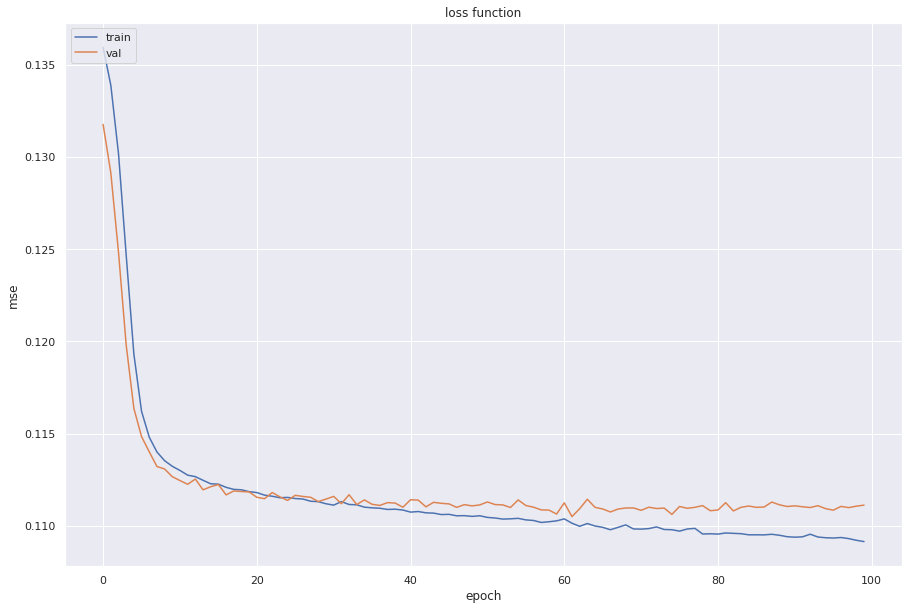

In [37]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss function')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


##Evaluate Model on Test Data

In [38]:
# Evaluate your model accuracy on the test data
loss_test = model.evaluate(X_test,y_test)

# Print accuracy
print('mse_test:', loss_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.1057
mse_test: 0.10573112964630127


In [39]:
model.save('DirectSun03twisted.h5')

##Model 2


In [55]:
# Instantiate a sequential model
model = tf.keras.models.Sequential()
n_cols = x_scaled.shape[1]  

# Add 2 dense layers of 50 and 32 neurons each
model.add(tf.keras.layers.Dense(50, input_shape=(n_cols,), activation='relu'))
#model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(5, activation='relu'))
# Add a dense layer with 1 value output
model.add(tf.keras.layers.Dense(100, activation= "sigmoid")) # NUMBER NEED TO MATCH THE NUMBER OF VALUES TO BE PREDICTED  ALSO TRY LINEAR INSTED OF SIGMOID REGRESSIONM
  
# Compile your model 
model.compile(optimizer = "adam", loss = "mean_squared_error")

In [56]:
# Fit your model to the training data for 500 epochs
#we assign this to history variable so we can plot the training data

history = model.fit(X_train,y_train,epochs=500, validation_split=0.2)

Epoch 1/500
30/30 [==============================] - 1s 7ms/step - loss: 0.1361 - val_loss: 0.1321
Epoch 2/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1344 - val_loss: 0.1303
Epoch 3/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1318 - val_loss: 0.1275
Epoch 4/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1279 - val_loss: 0.1240
Epoch 5/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1236 - val_loss: 0.1208
Epoch 6/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1198 - val_loss: 0.1180
Epoch 7/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1171 - val_loss: 0.1159
Epoch 8/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1155 - val_loss: 0.1145
Epoch 9/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1144 - val_loss: 0.1138
Epoch 10/500
30/30 [==============================] - 0s 3ms/step - loss: 0.1136 - val_loss: 0.1131
Epoch 11/

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 50)                300       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_12 (Dense)             (None, 100)               600       
Total params: 1,465
Trainable params: 1,465
Non-trainable params: 0
_________________________________________________________________


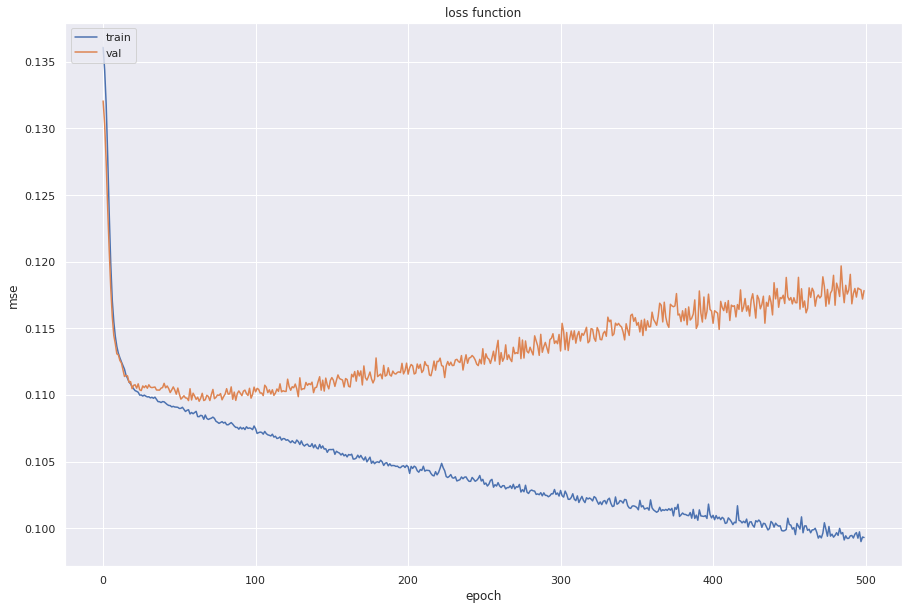

In [57]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss function')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [52]:
# Evaluate your model accuracy on the test data
loss_test = model.evaluate(X_test,y_test)

# Print accuracy
print('mse_test:', loss_test)

10/10 [==============================] - 0s 2ms/step - loss: 13.0003
mse_test: 13.000271797180176


In [53]:
model.save('DirectSun04twisted.h5')

#Plot Error

In [45]:
def plot_comparison(x_val, pred, truth, xlab, ylab):
  fig, ax1 = plt.subplots()
  ax1.plot(x_val, truth, color = "red", label = "truth",linestyle='None', marker = "o", markersize = 5)
  ax1.plot(x_val, pred, color = "blue", label = "pred",linestyle='None', marker = "o", markersize = 4, alpha = 0.5)

  ax1.set_xlabel(xlab)
  ax1.set_ylabel(ylab)
  ax1.legend()
  fig.set_figheight(10)
  fig.set_figwidth(20)
  plt.title('Prediction Comparison')
  plt.show()

In [46]:
# We can also inspect our results visually
y_pred = scalerY.inverse_transform(model.predict(X_test))
y_test = scalerY.inverse_transform(y_test)
y_test.shape
y_pred.shape

#data_test["y_predANN"] = y_pred[:,:100]
#data_test["truth"] = y_test[:,1]
#sns.scatterplot(x = "y_predANN", y = "truth", data = data_test)

(301, 100)

#Save Model

In [47]:
#model.save('COM_VISION-ML_REGRESSION_MODEL-V03.h5')

In [48]:
import numpy as np
# File path
filepath = '/content/gdrive/MyDrive/S3/DATA ENCODING/AIA - DATA ENCODING  G06/01_WORKING FILES/Model '


# Load the model
#model = tf.keras.models.load_model(filepath, compile = True)

# Im giving it the values of the first row just to check what happens

#raw x values: 18.896986 	87.101372 	33.423961 	69.709425 	905684.79 	19016.096966 	2294.836551 	45.302281
#raw y values: 9020.00 	0.1443 	-3999265.33

#fit.transformed x values - [ 1.58656104  1.57439087  1.69183861  1.47684253  1.76488417  0.67673085   -0.67673085  1.98552519]
#fit.transformed y values[ 0.62423916 -0.07021049 -1.732858  ]



# : the txt file from gabriella would go here instead

#samples_to_predict = [[18.896986, 87.101372, 33.423961, 69.709425, 905684.79, 19016.096966, 2294.836551, 45.302281]]
#array_samples = np.array(samples_to_predict)

#uncomment this in case we want multiple block predictions at once
#length = len(samples_to_predict)
#reshaped = array_samples.reshape(length,8)

#scaled_samples = scalerX.fit_transform(array_samples)

# Generate predictions for samples
#predictions = model.predict(scaled_samples)


# Decode them back
#NOTE THAT e+03 means the comma moves 3 times to the right, while e-01 it moves 1 time to the left. Keep that in mind when interpreting the output!
#final_predictions = scalerY.inverse_transform(predictions)
#print(final_predictions)

#Save the txt for grasshopper to read
#np.savetxt("prediction.txt", final_predictions)
#print("text Saved")